## Лабораторна робота 1 
#### Пушкар Максим, Варіант 11

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Файл з даними: Medicare.csv

In [4]:
data = pd.read_csv("Medicare.csv")
data.head()

,STATE,YEAR,TOT_CHG,COV_CHG,MED_REIB,TOT_D,NUM_DCHG,AVE_T_D,NMSTATE
0,1,1,2211617271,2170240349,972752944,1932673,230015,8,AL
1,1,2,2523987347,2468263759,1046016144,1936939,234739,8,AL
2,1,3,2975969979,2922611694,1205791592,2016354,245027,8,AL
3,1,4,3194595003,3149745611,1307982985,1948427,243947,8,AL
4,1,5,3417704863,3384305357,1376211788,1926335,258384,7,AL


Вiдгук: COV_CHG

Регресори: TOT_CHG, MED_REIB, TOT_D, NUM_DCHG, AVE_T_D

Зформуємо дані:

In [5]:
y = data["COV_CHG"]
x = data[["TOT_CHG", "MED_REIB", "TOT_D", "NUM_DCHG", "AVE_T_D"]]

Будуємо матрицю кореляції між регресорами

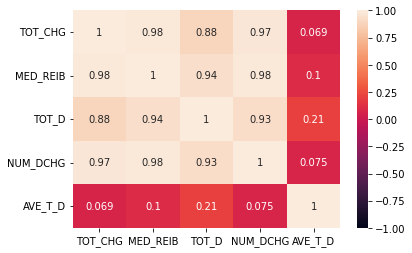

In [6]:
# https://datatofish.com/correlation-matrix-pandas/
corrMatrix = x.corr()

import seaborn as sn
sn.heatmap(corrMatrix, annot=True, vmin=-1)
plt.show()

Можна бачити, що перші 4 параметри є дуже залежними один від одного, а останній має порівняно невелику кореляцію з кожним із інших параметрів.

Спостерігаючи цю сильну залежність, додамо у матрицю ще й відгук,
щоб подивитися його кореляцію з регресорами.

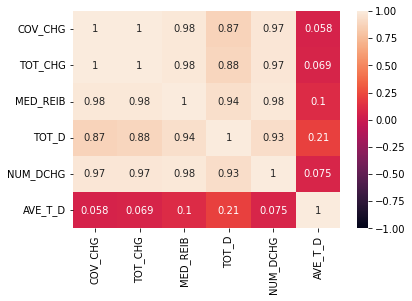

In [7]:
corrMatrix_1 = data[["COV_CHG", "TOT_CHG", "MED_REIB", "TOT_D", "NUM_DCHG", "AVE_T_D"]].corr()

sn.heatmap(corrMatrix_1, annot=True, vmin=-1)
plt.show()

Отримали дуже велику кореляцію відгуку з кожним із регресорів (крім останнього), а з першим регресором кореляція взагалі дорівнює 1. Тому можна очікувати, що TOT_CHG буде найважливішим регресором. Якщо перейти за посиланням, та подивитися на суть даних, звідки вони взяті, то це буде мати ще більше сенсу.

#### ОНК

In [8]:
# https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

In [9]:
# поділ на тестову та тренувальну у пропорцiх 20% та 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# будуємо ОНК
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

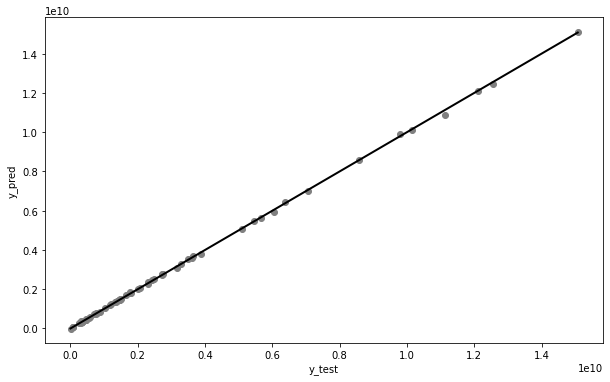

In [11]:
# print(np.shape(y_test), np.shape(y_pred))
#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.show()

# В багатовимірному випадку немає можливості побудувати графік з осями X та y, 
# тому зобразимо залежність y_test та y_pred

plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, color='gray')
plt.plot([0, max(y_test)], [0, max(y_test)], color='black', linewidth=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [20]:
# перевіряємо якість моделі
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mean_sq_error = (mean_squared_error(y_test, y_pred))
mean_error = mean_absolute_error(y_test, y_pred)
print(r2)
print(mean_sq_error)
print(mean_error)
print()
print(regressor.coef_)

0.9998177385446197
2124119007285158.5
27550111.616482083

[ 9.75073557e-01 -6.93704251e-02 -1.26361259e+02  1.63190264e+03
  1.78757554e+06]


Отримали значення $R^2$ настільки близьке до 1, наскільки це взагалі практично можливо (на тестовій вибірці)

Відхилення виявились великими, але порівняно з величиною даних вони є досить нормальними.

#### F-тест:

In [13]:
# https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

Feature 0: 134994.292772
Feature 1: 4974.562160
Feature 2: 722.854162
Feature 3: 3999.254887
Feature 4: 1.108785


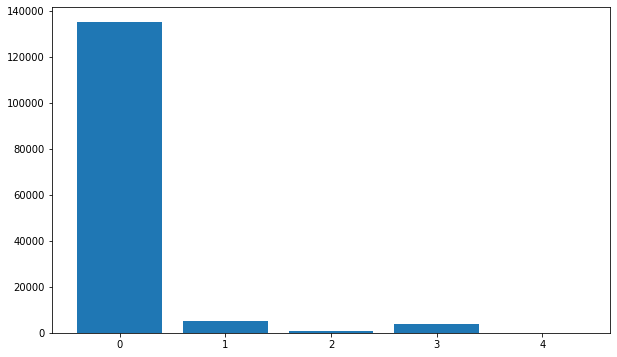

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(f_regression, k=3)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Очевидно, 1й регресор має найбільший вплив (про що було написано вище), 2й та 4й також мають порівняно великий вплив. Якщо залишити лише ці регресори, то матимемо наступний результат:

In [21]:
from sklearn.linear_model import LinearRegression
regressor_fs = LinearRegression()  
regressor_fs.fit(X_train_fs, y_train)

y_pred_fs = regressor_1.predict(X_test_fs)

r2_fs = r2_score(y_test, y_pred_fs)
mean_sq_error_fs = mean_squared_error(y_test, y_pred_fs)
mean_error_fs = mean_absolute_error(y_test, y_pred_fs)
print(r2_fs)
print(mean_sq_error_fs)
print(mean_error_fs)
print()
print(regressor_fs.coef_)

0.9993695529608199
7347382013466891.0
50061959.2984247

[ 1.08327382e+00 -3.84808630e-01  9.96466596e+02]


Бачимо, що значення $R^2$ змінилось незначно, лише в 4му знаку після коми. Але дисперсія сильно зросла. Середнє відхилення зросло майже вдвічі.

#### Гребенева регресія 

In [17]:
# https://machinelearningmastery.com/ridge-regression-with-python/
from sklearn.linear_model import Ridge

In [18]:
alpha_list = [0.5, 1, 5, 10, 100]

In [22]:
print(mean_sq_error)

for i in range(len(alpha_list)):
    model = Ridge(alpha=alpha_list[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Ridge(alpha=%a)" % alpha_list[i])
    print('r2_score =', r2_score(y_test, y_pred))
    print('mean squared error =', mean_squared_error(y_test, y_pred))
    print()

2124119007285158.5
Ridge(alpha=0.5)
r2_score = 0.9998178166904943
mean squared error = 2123208276394653.8

Ridge(alpha=1)
r2_score = 0.9998178162875935
mean squared error = 2123212971899212.2

Ridge(alpha=5)
r2_score = 0.9998178130681868
mean squared error = 2123250491640532.8

Ridge(alpha=10)
r2_score = 0.9998178090534079
mean squared error = 2123297280843588.2

Ridge(alpha=100)
r2_score = 0.9998177385446197
mean squared error = 2124119007285158.5



C:\Users\MAXIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.57731e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAXIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.57867e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAXIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.5895e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\MAXIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.60303e-19): result may not be accurate.
  return linalg.solve(A, Xy,

Порівняно зі звичайною лінійною регресією, не можна сказати, що нам вдалося достатньо сильно зменшити дисперсію за допомого цього методу, хоча дисперсія, звичайно, зменшилася в четвертому знаку. 

#### Нелінійна регресія 

Враховуючи все побачене до цього, складно очікувати кращого кращого резльтату, адже за змістом даних складно очікувати залежність більшого порядку. До того ж ми вже маємо майже неперевершений результат $R^2 = 0.9998$, проте можливо за допомогою нелінійності ми зможемо зменшити дисперсію:

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures

# будемо розглядати квадратичні поліноми від даних
polynomial_2 = PolynomialFeatures(degree=2)
X_train_p = polynomial_2.fit_transform(X_train)
X_test_p = polynomial_2.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_p, y_train)
y_pred_p = model.predict(X_test_p)

print(mean_sq_error)

print("PolynomialFeatures(degree=2)")
print('r2_score =', r2_score(y_test, y_pred_p))
mean_sq_error_p = mean_squared_error(y_test, y_pred_p)
print('mean squared error =', mean_sq_error_p)
print()

2124119007285158.5
PolynomialFeatures(degree=2)
r2_score = 0.999946406314001
mean squared error = 624593756609100.2



Можна бачити, що ми насправді покращили обидва параметри: $R^2$ став ще більшим (але для наших величин $R^2$ це несуттєво), а дисперсія зменшилася майже вдвічі. Цей метод виявився найбільш ефективним (що й не дивно, адже він не створює додаткових обмежень, як інші методи. 

Для повноти картини подивимося, чи можна досягнути набагато кращого результату для поліномів 3го степеня:

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures

# будемо розглядати кубічні поліноми від даних
polynomial_3 = PolynomialFeatures(degree=3)
X_train_p_1 = polynomial_3.fit_transform(X_train)
X_test_p_1 = polynomial_3.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_p_1, y_train)
y_pred_p_1 = model.predict(X_test_p_1)

print(mean_sq_error)
print(mean_sq_error_p)
print()
print("PolynomialFeatures(degree=3)")
print('r2_score =', r2_score(y_test, y_pred_p_1))
print('mean squared error =', mean_squared_error(y_test, y_pred_p_1))
print()

2124119007285158.5
624593756609100.2

PolynomialFeatures(degree=3)
r2_score = 0.9858486346907558
mean squared error = 1.6492342810326054e+17



Неочікувано, всі параметри значно погіршилися, як $R^2$ так і дисперсія.

In [80]:
# https://www.journaldev.com/45109/normalize-data-in-python
    
from sklearn.preprocessing import normalize
X_train_n = normalize(X_train)
X_test_n = normalize(X_train)
y_train_n = (y_train - np.mean(y_train))/(np.std(y_train))


fs_1 = SelectKBest(f_regression, k=2)
fs_1.fit(X_train_n, y_train_n)
X_train_fs = fs_1.transform(X_train_n)
X_test_fs = fs_1.transform(X_test_n)

for i in range(len(fs_1.scores_)):
	print('Feature %d: %f' % (i, fs_1.scores_[i]))

Feature 0: 20.751003
Feature 1: 20.731774
Feature 2: 5.132674
Feature 3: 51.393553
Feature 4: 3.224366


In [55]:
# https://colab.research.google.com/drive/1s5HOXulJzZX-fca0ODdj1xrVPyTBtIim#scrollTo=4fa79f93
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

metrics_model = []
all_models = []
for model_name, model in [('logistic(C=1)', LogisticRegression()), 
                         ('logistic(C=2)', LogisticRegression(C=2)),
                         ('GaussianNB', GaussianNB())
                         ]:
    metrics = []
    for i in range(5):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=1, test_size=0.3)
        
        model.fit(x_tr, y_tr)
        
        y_tr_pred = model.predict(x_tr)
        metric = {}
        metric['train_f1'] = f1_score(y_tr, y_tr_pred)
        metric['train_precision'] = precision_score(y_tr, y_tr_pred)
        metric['train_recall'] = recall_score(y_tr, y_tr_pred)
        
        y_val_pred = model.predict(x_val)
        metric['test_f1'] = f1_score(y_val, y_val_pred)
        metric['test_precision'] = precision_score(y_val, y_val_pred)
        metric['test_recall'] = recall_score(y_val, y_val_pred)
        
        metrics.append(metric)
        
        all_models.append(model)
    
    model_avg = pd.DataFrame(metrics).mean()
    model_avg['model'] = model_name
    metrics_model.append(model_avg)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regressor = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.score(y_pred, y_test)
print(regressor.coef_)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)
print('alpha: %f' % model.alpha_)